Notebook criado para o desenvolvimento do trabalho de MABD sobre E-Commerce.




Fazendo todos os imports necessários para o desenvolvimento do código

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Instala a função para criar o overview dos dados.

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Retira as colunas com o nome "Unnamed" que foram criadas ao exportar a base de dados em CSV.

In [ ]:
e_commerce = e_commerce.drop(columns=['Unnamed: 0'])
e_commerce = e_commerce.drop(columns=['Unnamed: 0_x'])
e_commerce = e_commerce.drop(columns=['Unnamed: 0_y'])

Mostra as informações atuais contidas na base.

In [ ]:
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117601 non-null  object 
 1   customer_unique_id             117601 non-null  object 
 2   customer_zip_code_prefix       117601 non-null  int64  
 3   customer_city                  117601 non-null  object 
 4   customer_state                 117601 non-null  object 
 5   order_id                       117601 non-null  object 
 6   order_status                   117601 non-null  object 
 7   order_purchase_timestamp       117601 non-null  object 
 8   order_approved_at              117586 non-null  object 
 9   order_delivered_carrier_date   116356 non-null  object 
 10  order_delivered_customer_date  115034 non-null  object 
 11  order_estimated_delivery_date  117601 non-null  object 
 12  product_id                    

Mostra as cinco primeiras linhas da base.

In [ ]:
e_commerce.head()

customer_id  ... payment_value
0  06b8999e2fba1a1fbc88172c00ba8bc7  ...        146.87
1  18955e83d337fd6b2def6b18a428ac77  ...        335.48
2  4e7b3e00288586ebd08712fdd0374a03  ...        157.73
3  b2b6027bc5c5109e529d4dc6358b12c3  ...        173.30
4  4f2d8ab171c80ec8364f7c12e35b23ad  ...        252.25

[5 rows x 30 columns]

Retira algumas colunas que não serão usadas.

In [ ]:
e_commerce = e_commerce.drop(columns=['product_photos_qty'])
e_commerce = e_commerce.drop(columns=['product_name_lenght'])
e_commerce = e_commerce.drop(columns=['product_description_lenght'])
e_commerce = e_commerce.drop(columns=['product_weight_g'])
e_commerce = e_commerce.drop(columns=['product_length_cm'])
e_commerce = e_commerce.drop(columns=['product_height_cm'])
e_commerce = e_commerce.drop(columns=['product_width_cm'])


Verifica se há dados nulos.

In [ ]:
e_commerce.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
product_id                          0
product_category_name            1698
order_item_id                       0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

In [ ]:
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117601 non-null  object 
 1   customer_unique_id             117601 non-null  object 
 2   customer_zip_code_prefix       117601 non-null  int64  
 3   customer_city                  117601 non-null  object 
 4   customer_state                 117601 non-null  object 
 5   order_id                       117601 non-null  object 
 6   order_status                   117601 non-null  object 
 7   order_purchase_timestamp       117601 non-null  object 
 8   order_approved_at              117586 non-null  object 
 9   order_delivered_carrier_date   116356 non-null  object 
 10  order_delivered_customer_date  115034 non-null  object 
 11  order_estimated_delivery_date  117601 non-null  object 
 12  product_id                    

Retira as linhas que contenham os valores nulos.

In [ ]:
e_commerce.dropna(inplace=True)

In [ ]:
e_commerce.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_id                       0
product_category_name            0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

Para maior consistência nos dados, retira as linhas com valores que não fazem sentido (inicialmente).

In [ ]:
e_commerce.drop(e_commerce.loc[e_commerce['payment_installments'] == 0].index, inplace=True)

In [ ]:
e_commerce.drop(e_commerce.loc[e_commerce['payment_value'] != e_commerce['price']+ e_commerce['freight_value']].index, inplace=True)

Chama a função que gera o overview dos dados.

In [ ]:
profile = ProfileReport(e_commerce, title='Dados E-Commerce', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

Faz a junção do banco de "e_commerce" com o de vendedores.

In [ ]:
e_commerce = pd.merge(e_commerce, vendedor, how = 'inner', on ='seller_id')

Cria a variável "compradores" com o código zip de todos os compradores da base de dados.

In [ ]:
compradores = e_commerce['customer_zip_code_prefix']

In [ ]:
compradores = pd.DataFrame(compradores)

In [ ]:
compradores

customer_zip_code_prefix
0                         14409
1                          1151
2                          8775
3                         65075
4                          4342
...                         ...
67073                     41815
67074                     39920
67075                     39560
67076                     76400
67077                     13185

[67078 rows x 1 columns]

In [ ]:
compradores.rename(columns = {'customer_zip_code_prefix' : 'geolocation_zip_code_prefix'}, inplace=True)

In [ ]:
compradores = pd.merge(compradores, geolocalizacao, how='inner', on='geolocation_zip_code_prefix')

In [ ]:
compradores.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
compradores.dropna(inplace=True)

Faz o mesmo que anteriormente, só que com os vendedores, gerando um dataframe com a posição geográfica de todos os vendedores (lojas).

In [ ]:
vendedores = e_commerce['seller_zip_code_prefix']

In [ ]:
vendedores = pd.DataFrame(vendedores)

In [ ]:
vendedores.rename(columns = {'seller_zip_code_prefix' : 'geolocation_zip_code_prefix'}, inplace=True)

In [ ]:
vendedores = pd.merge(vendedores, geolocalizacao, how='inner', on='geolocation_zip_code_prefix')

In [ ]:
compradores.geolocation_state.value_counts()

SP    3772946
RJ    2003302
MG    1929671
RS     540760
PR     416353
SC     361040
BA     246443
ES     223370
GO      88751
MT      81341
PE      79213
DF      63362
PA      57181
CE      43765
MS      40763
MA      38469
AL      27665
PB      18852
SE      18349
PI      17324
RO      14274
RN      13723
TO      11981
AC       5417
AM       4292
AP       3675
RR       1125
Name: geolocation_state, dtype: int64

In [ ]:
vendedores.geolocation_state.value_counts()

SP    6287017
MG    1177459
PR     699052
RJ     604106
SC     419201
RS     260655
DF      42730
BA      40837
MA      29304
GO      16482
ES      13364
PE       6992
MT       6620
MS       3361
CE       2285
RO       1564
PB       1326
RN        926
SE        243
AM         81
PI         40
Name: geolocation_state, dtype: int64

Gera um segundo dataframe que contém 1% dos valores de compradores.
Faz o mesmo com vendedores.

In [ ]:
compradores2 = compradores.sample(frac=0.01)

In [ ]:
compradores2

geolocation_zip_code_prefix  ...  geolocation_state
1947945                        22710  ...                 RJ
9273289                        19806  ...                 SP
1388699                        11680  ...                 SP
3990276                        13820  ...                 SP
9028030                        32667  ...                 MG
...                              ...  ...                ...
5611298                        88020  ...                 SC
4275149                        18550  ...                 SP
8671635                        89500  ...                 SC
7276995                         8191  ...                 SP
7303482                        11950  ...                 SP

[101234 rows x 5 columns]

In [ ]:
compradores2.geolocation_state.value_counts()

SP    37763
RJ    19984
MG    19396
RS     5530
PR     4114
SC     3578
BA     2409
ES     2204
GO      921
MT      756
PE      746
DF      675
PA      546
CE      462
MS      436
MA      383
AL      254
SE      183
PB      180
PI      178
RO      137
RN      132
TO      116
AM       52
AC       51
AP       36
RR       12
Name: geolocation_state, dtype: int64

In [ ]:
vendedores2 = vendedores.sample(frac=0.01)

Configurações básicas da visualização do mapa. Location são as coordenadas inciais do mapa (aonde ele surge com o foco), zoom_start o zoom inicial e "tiles" o tipo de mapa.



In [ ]:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='OpenStreetMap')
mapa2 = folium.Map(location=[-15.788497, -47.879873],zoom_start=5, tiles='OpenStreetMap')

Faz um for para puxar os valores de latitude e longitude dos compradores e vendedores e armazenar em coordenadas e coordenadas2, respectivamente.

In [ ]:
coordenadas=[]
for lat,lng in zip(compradores2.geolocation_lat.values,compradores2.geolocation_lng.values):
  coordenadas.append([lat,lng])

In [ ]:
coordenadas2=[]
for lat,lng in zip(vendedores2.geolocation_lat.values,vendedores2.geolocation_lng.values):
  coordenadas2.append([lat,lng])

Chama a função para plotar os mapas em si utilizando os valores de latitude e longitude armazenados. No caso, escolhemos utilizar um mapa de calor chamando "plugins.Heatmap".

In [ ]:
mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
mapa2.add_child(plugins.HeatMap(coordenadas2))        
mapa2

Output hidden; open in https://colab.research.google.com to view.

Criamos um dataframe separado para armazenar os preços médios dos produtos subdivididos em suas categorias.

In [ ]:
categorias = e_commerce.groupby(['product_category_name'])['price'].mean()

In [ ]:
categorias = pd.DataFrame(categorias)

In [ ]:
categorias

price
product_category_name                
agro_industria_e_comercio  385.104184
alimentos                   62.835020
alimentos_bebidas           70.472229
artes                      133.884483
artes_e_artesanato          93.516000
...                               ...
sinalizacao_e_seguranca    122.741047
tablets_impressao_imagem    91.807761
telefonia                   82.598843
telefonia_fixa             158.498176
utilidades_domesticas      102.070025

[73 rows x 1 columns]

In [ ]:
categorias.reset_index(level=0, inplace=True)

In [ ]:
categorias = categorias.sort_values(by=['price'],ignore_index=True,na_position='first')

Após ordenar os valores do menor para o maior, armazenamos os dados dos cinco menores valores em "categoria1" e dos cinco maiores em "categoria1".

In [ ]:
categoria1 = categorias.loc[0:4]
categoria2 = categorias.loc[68:73]

In [ ]:
categoria1

product_category_name      price
0                flores  29.417500
1       casa_conforto_2  37.784667
2       fraldas_higiene  47.052941
3     cds_dvds_musicais  55.000000
4           eletronicos  57.799220

In [ ]:
categoria2

product_category_name        price
68  portateis_cozinha_e_preparadores_de_alimentos   351.242727
69                      agro_industria_e_comercio   385.104184
70                             eletrodomesticos_2   515.496995
71                    portateis_casa_forno_e_cafe   681.043934
72                                            pcs  1173.808750

Para que no gráfico apresente os nomes da categoria de forma correta, foi necessário renomear o index de cada linha para o nome desejado.

In [ ]:
categoria1 = categoria1.rename({0: 'Flores', 1: 'Casa_Conforto2', 2: 'Fraldas_Higiene', 3: 'Cds_Dvds_Musicais', 4: 'Eletronicos'})

Chamada da função para plotar os valores em um gráfico de barra.

Text(0.5, 0, 'Valor médio dos produtos')

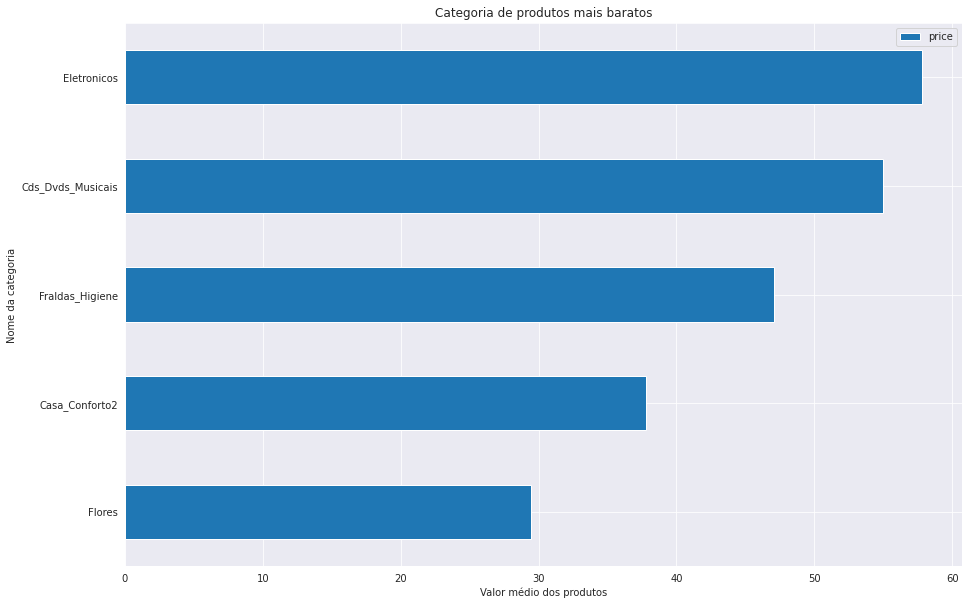

In [ ]:
categoria1.plot(kind='barh', figsize=(15,10))
plt.title("Categoria de produtos mais baratos")
plt.ylabel("Nome da categoria")
plt.xlabel("Valor médio dos produtos")

In [ ]:
categoria2 = categoria2.rename({68: 'Cozinha_Preparadores', 69: 'Agro_Ind_Comercio', 70: 'Eletrodomesticos2', 71: 'Portateis_Casa_Forno', 72: 'Pcs'})

Text(0.5, 0, 'Valor médio dos produtos')

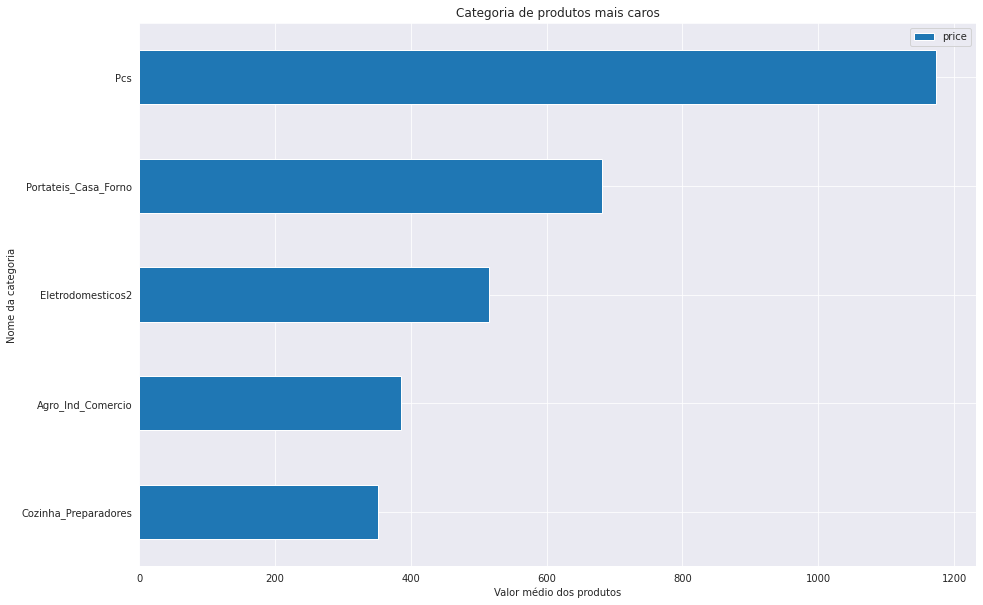

In [ ]:
categoria2.plot(kind='barh', figsize=(15,10))
plt.title("Categoria de produtos mais caros")
plt.ylabel("Nome da categoria")
plt.xlabel("Valor médio dos produtos")

Primeiro, modicamos a maneira com que os dados de data dos produtos eram visualizados para o padrão de "Ano, mês, dia" e armazenamos em uma variável. Depois, somamos todas os produtos recorrentes a cada mês com "value_counts" e armazenamos para enfim plotar essa informação em um gráfico.

In [ ]:
e_commerce['shipping_limit_month'] = e_commerce['shipping_limit_date'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%B-%Y'))

bar = e_commerce['shipping_limit_month'].value_counts()
fig = px.bar(x=bar.index , y=bar.values , text=bar.values , labels={'x':'Meses','y':'Número'})

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',
                 marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                 marker_line_width=1.5, opacity=.7)

fig.update_layout(title_text='Meses com o maior número de envios')
fig.show()

In [ ]:
fig = px.histogram(x=e_commerce['shipping_limit_month'], y=e_commerce['price'],
                  labels={'x':'Mes','y':'Preço'})


fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.7)


fig.update_layout(title_text='Somatório do preço total por mês')

Armazenamos em uma variável o valor médio dos produtos em cada mês e depois plotamos em um gráfico.

In [ ]:
fig = px.histogram(x=e_commerce['shipping_limit_month'], y=e_commerce['price'],histfunc='avg',
                  labels={'x':'Mês','y':'Preço'})


fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.7)


fig.update_layout(title_text='Média do preço total em cada mês')

Da mesma forma que se fez com o valor médio, fizemos para o valor mínimo utilizando o parâmetro "histfunc='min'".

In [ ]:
fig = px.histogram(x=e_commerce['shipping_limit_month'], y=e_commerce['price'],histfunc='min',
                  labels={'x':'Mes','y':'Preço'})


fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.7)


fig.update_layout(title_text='Preço minimo em cada mês')

Semelhante ao anterior, só que com o valor máximo.

In [ ]:
fig = px.histogram(x=e_commerce['shipping_limit_month'], y=e_commerce['price'],histfunc='max',
                   labels={'x':'Mes','y':'Preço'})


fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.7)


fig.update_layout(title_text='Preço máximo em cada mês')

Puxamos a tabela de reviews do drive.

In [ ]:
review = pd.read_csv('/content/drive/My Drive/MABD/E-Commerce/olist_order_reviews_dataset.csv')


Retiramos todas as colunas que decidimos que não vamos usar.

In [ ]:
review = review.drop(columns=['review_id'])
review = review.drop(columns=['review_comment_title'])
review = review.drop(columns=['review_comment_message'])
review = review.drop(columns=['review_creation_date'])
review = review.drop(columns=['review_answer_timestamp'])

Verifica se há algum valor nulo nos dados.

In [ ]:
review.isnull().sum()

order_id        0
review_score    0
dtype: int64

Visualiza quais as principais informações desse dataframe.

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      100000 non-null  object
 1   review_score  100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


Junta o dataframe "e_commerce" com o dataframe de reviews, fazendo ligação pela coluna "order_id", que é presente nos dois.

In [ ]:
e_commerce = pd.merge(e_commerce, review, how = 'inner', on ='order_id')

In [ ]:
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67442 entries, 0 to 67441
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    67442 non-null  object 
 1   customer_unique_id             67442 non-null  object 
 2   customer_zip_code_prefix       67442 non-null  int64  
 3   customer_city                  67442 non-null  object 
 4   customer_state                 67442 non-null  object 
 5   order_id                       67442 non-null  object 
 6   order_status                   67442 non-null  object 
 7   order_purchase_timestamp       67442 non-null  object 
 8   order_approved_at              67442 non-null  object 
 9   order_delivered_carrier_date   67442 non-null  object 
 10  order_delivered_customer_date  67442 non-null  object 
 11  order_estimated_delivery_date  67442 non-null  object 
 12  product_id                     67442 non-null 

Retira todos os valores nulos após o merge, caso haja algum.

In [ ]:
e_commerce.dropna(inplace=True)

In [ ]:
e_commerce.head()

customer_id  ... review_score
0  06b8999e2fba1a1fbc88172c00ba8bc7  ...            4
1  4e7b3e00288586ebd08712fdd0374a03  ...            5
2  b2b6027bc5c5109e529d4dc6358b12c3  ...            5
3  4c06b42fbf7b97ab10779cda5549cd1c  ...            1
4  fc570b6557c9a63780acb28007d313f0  ...            4

[5 rows x 28 columns]

Plota em um gráfico o número de ordens por review, agrupando-se os valores pelo paramêtro "review_score".

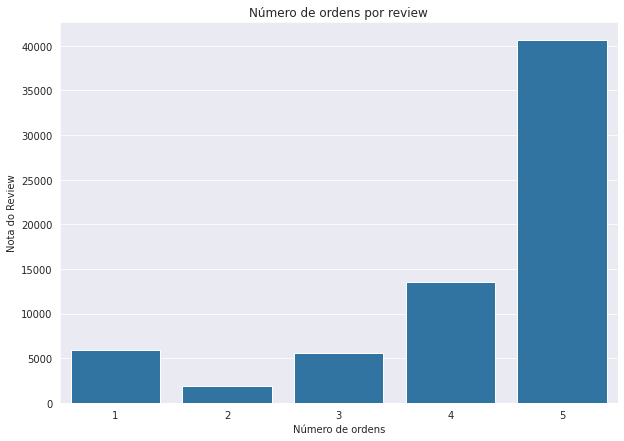

In [ ]:
base_color = sns.color_palette()[0]

plt.figure(figsize = (10,7))
sns.barplot(data = e_commerce.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id', color = base_color)
plt.title('Número de ordens por review')
plt.xlabel('Número de ordens')
plt.ylabel('Nota do Review');

Visualização do que foi feito anteriormente de outra forma.

In [ ]:
data = e_commerce.groupby('review_score').count()['order_id'].reset_index()
data

review_score  order_id
0             1      5875
1             2      1902
2             3      5550
3             4     13512
4             5     40603

Primeiro, agrupa-se os valores de review por categoria e se faz a média deles, armazenando-se em uma variável. Logo após, utilizamos um "sort" para organizar esses valores em ordem e armazenamos nas variáveis "top_5_ratings" e "lowest_5_ratings" os 5 maiores e menores valores de review, respectivamente. 

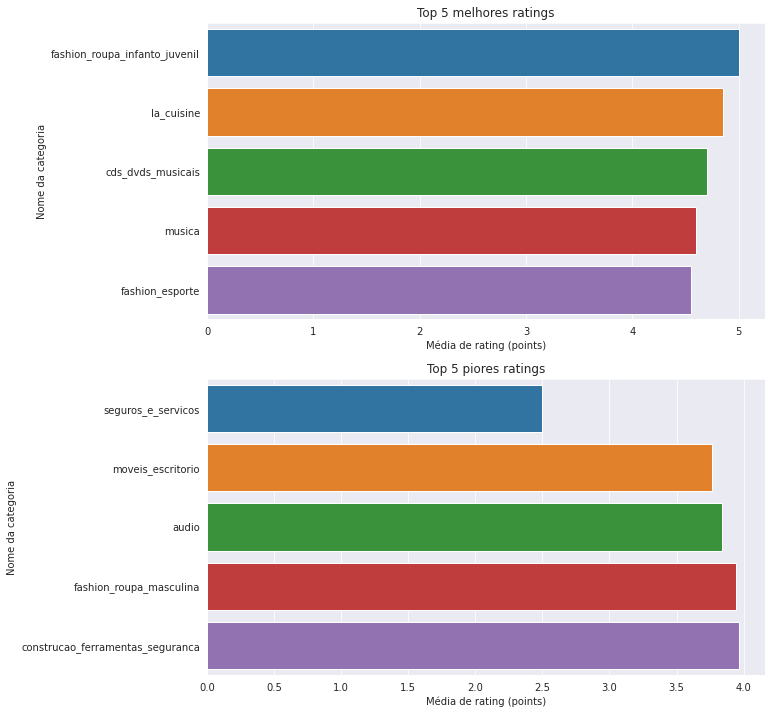

In [ ]:
prd_rev_means = e_commerce.groupby('product_category_name').mean()['review_score'].reset_index()
top_5_ratings = prd_rev_means.sort_values('review_score', ascending = False).nlargest(5,'review_score')
lowest_5_ratings = prd_rev_means.sort_values('review_score', ascending = False).nsmallest(5,'review_score')

plt.figure(figsize = (10,12))

sns.barplot(data = e_commerce.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id')
plt.title('Order Count by Review Score')
plt.xlabel('Order Count')
plt.ylabel('Review Score')

plt.subplot(211)
sns.barplot(data = top_5_ratings, x = 'review_score', y = 'product_category_name')
plt.title('Top 5 melhores ratings')
plt.xlabel('Média de rating (points)')
plt.ylabel('Nome da categoria');

plt.subplot(212)
sns.barplot(data = lowest_5_ratings, x = 'review_score', y = 'product_category_name')
plt.title('Top 5 piores ratings')
plt.xlabel('Média de rating (points)')
plt.ylabel('Nome da categoria');


Outra forma de visualização do gráfico anterior.


In [ ]:
top_5_ratings

product_category_name  review_score
37  fashion_roupa_infanto_juvenil      5.000000
46                     la_cuisine      4.857143
17              cds_dvds_musicais      4.700000
58                         musica      4.600000
35                fashion_esporte      4.555556

In [ ]:
lowest_5_ratings

product_category_name  review_score
67                seguros_e_servicos      2.500000
55                 moveis_escritorio      3.763708
7                              audio      3.838951
38           fashion_roupa_masculina      3.944444
25  construcao_ferramentas_seguranca      3.961905

In [ ]:
e_commerce.head()

customer_id  ... review_score
0  06b8999e2fba1a1fbc88172c00ba8bc7  ...            4
1  4e7b3e00288586ebd08712fdd0374a03  ...            5
2  b2b6027bc5c5109e529d4dc6358b12c3  ...            5
3  4c06b42fbf7b97ab10779cda5549cd1c  ...            1
4  fc570b6557c9a63780acb28007d313f0  ...            4

[5 rows x 28 columns]

"Ibitinga" foi uma cidade apontada como uma das que mais vendeu segundo o overview, o que é um fato interessante. Aqui, verificamos qual a categoria de produtos mais vendido nessa cidade.

In [ ]:
e_commerce.loc[e_commerce['seller_city'] == 'ibitinga'] ['product_category_name'].value_counts()

cama_mesa_banho                  3341
moveis_decoracao                  537
casa_conforto                     128
bebes                              88
brinquedos                         37
utilidades_domesticas              23
automotivo                         16
casa_conforto_2                    13
fashion_roupa_masculina            12
moveis_sala                         7
fashion_roupa_feminina              7
pet_shop                            4
alimentos                           3
cool_stuff                          3
malas_acessorios                    2
relogios_presentes                  2
construcao_ferramentas_jardim       1
Name: product_category_name, dtype: int64